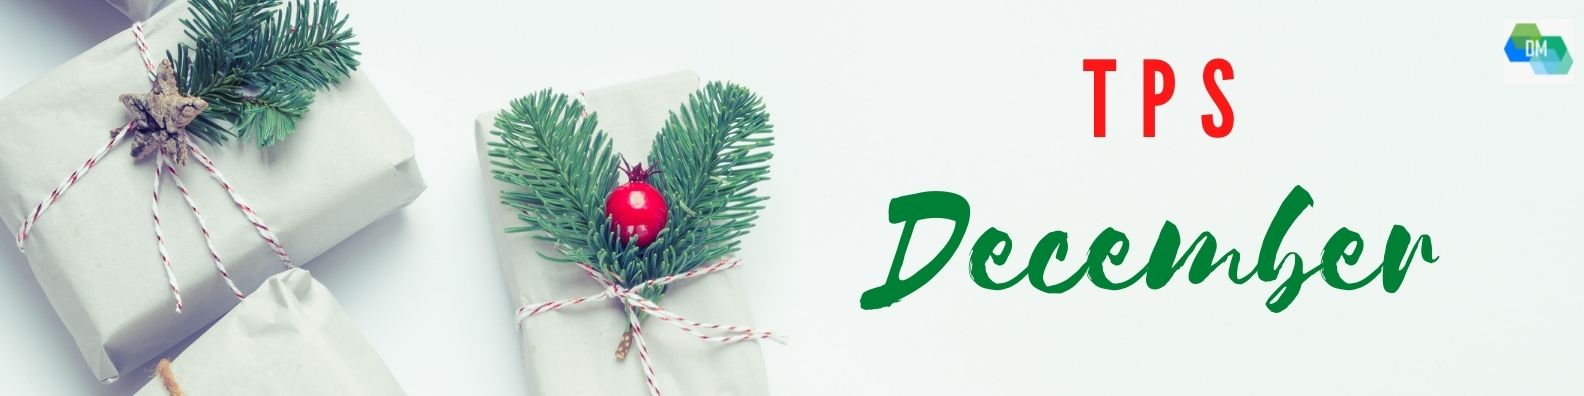

**Observations on this TPS dataset:**
- `Cover_Type` column is the target variable
- `Train` dataset has `40,00,000` rows and `56` columns which contains`54` features, `1` target variable `target` and `1` column of `id`
- `10` features are numerical and rest`44` features are categorical
- `Test` dataset has `10,00,000` rows and `55` columns which contains`54` features with`1` column of `id`
- No missing values in train and test dataset


<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio

import warnings
warnings.filterwarnings('ignore')

<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [2]:
#Reference: https://www.kaggle.com/c/tabular-playground-series-oct-2021/discussion/275854
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
df_train = pd.read_csv('../input/tabular-playground-series-dec-2021/train.csv')
reduce_mem_usage(df_train)
df_test = pd.read_csv('../input/tabular-playground-series-dec-2021/test.csv')
reduce_mem_usage(df_test)
df_subm = pd.read_csv("../input/tabular-playground-series-dec-2021/sample_submission.csv")

Mem. usage decreased to 259.40 Mb (84.8% reduction)
Mem. usage decreased to 63.90 Mb (84.8% reduction)


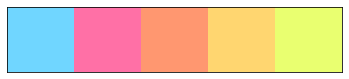

In [4]:
#Custom Color Palette 🎨
custom_colors = ["#70D6FF","#FF70A6","#FF9770","#FFD670","#E9FF70"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size=1.2)
plt.tick_params(axis='both', labelsize=0, length = 0)

In [5]:
df_train_row_count, df_train_column_count = df_train.shape
print('Total number of rows:', df_train_row_count)
print('Total number of columns:', df_train_column_count)

Total number of rows: 4000000
Total number of columns: 56


In [6]:
df_test_row_count, df_test_column_count = df_test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count)

Total number of rows: 1000000
Total number of columns: 55


In [7]:
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2


In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,4000000.0,2.000000e+06,1.154701e+06,0.0,999999.75,1999999.5,2999999.25,3999999.0
Elevation,4000000.0,2.980192e+03,2.890482e+02,1773.0,2760.00,2966.0,3217.00,4383.0
Aspect,4000000.0,1.515857e+02,1.099611e+02,-33.0,60.00,123.0,247.00,407.0
Slope,4000000.0,1.509754e+01,8.546731e+00,-3.0,9.00,14.0,20.00,64.0
Horizontal_Distance_To_Hydrology,4000000.0,2.713154e+02,2.265497e+02,-92.0,110.00,213.0,361.00,1602.0
Vertical_Distance_To_Hydrology,4000000.0,5.166262e+01,6.821597e+01,-317.0,4.00,31.0,78.00,647.0
Horizontal_Distance_To_Roadways,4000000.0,1.766642e+03,1.315610e+03,-287.0,822.00,1436.0,2365.00,7666.0
Hillshade_9am,4000000.0,2.118375e+02,3.075996e+01,-4.0,198.00,218.0,233.00,301.0
Hillshade_Noon,4000000.0,2.210614e+02,2.223134e+01,49.0,210.00,224.0,237.00,279.0
Hillshade_3pm,4000000.0,1.408109e+02,4.369864e+01,-53.0,115.00,142.0,169.00,272.0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 56 columns):
 #   Column                              Dtype
---  ------                              -----
 0   Id                                  int32
 1   Elevation                           int16
 2   Aspect                              int16
 3   Slope                               int8 
 4   Horizontal_Distance_To_Hydrology    int16
 5   Vertical_Distance_To_Hydrology      int16
 6   Horizontal_Distance_To_Roadways     int16
 7   Hillshade_9am                       int16
 8   Hillshade_Noon                      int16
 9   Hillshade_3pm                       int16
 10  Horizontal_Distance_To_Fire_Points  int16
 11  Wilderness_Area1                    int8 
 12  Wilderness_Area2                    int8 
 13  Wilderness_Area3                    int8 
 14  Wilderness_Area4                    int8 
 15  Soil_Type1                          int8 
 16  Soil_Type2                          

<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [10]:
df_train.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [11]:
df_test.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


<p style="font-family: Trebuchet MS; line-height: 2; font-size: 18px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #3a0ca3">There are no missing values.</p>

In [12]:
print ("Unique values are:\n",df_train.nunique())

Unique values are:
 Id                                    4000000
Elevation                                2525
Aspect                                    440
Slope                                      68
Horizontal_Distance_To_Hydrology         1636
Vertical_Distance_To_Hydrology            916
Horizontal_Distance_To_Roadways          7760
Hillshade_9am                             301
Hillshade_Noon                            221
Hillshade_3pm                             326
Horizontal_Distance_To_Fire_Points       8112
Wilderness_Area1                            2
Wilderness_Area2                            2
Wilderness_Area3                            2
Wilderness_Area4                            2
Soil_Type1                                  2
Soil_Type2                                  2
Soil_Type3                                  2
Soil_Type4                                  2
Soil_Type5                                  2
Soil_Type6                                  2
Soil_Type7    

In [13]:
df_train.drop(columns = 'Id', inplace = True)
df_test.drop(columns = 'Id', inplace = True)

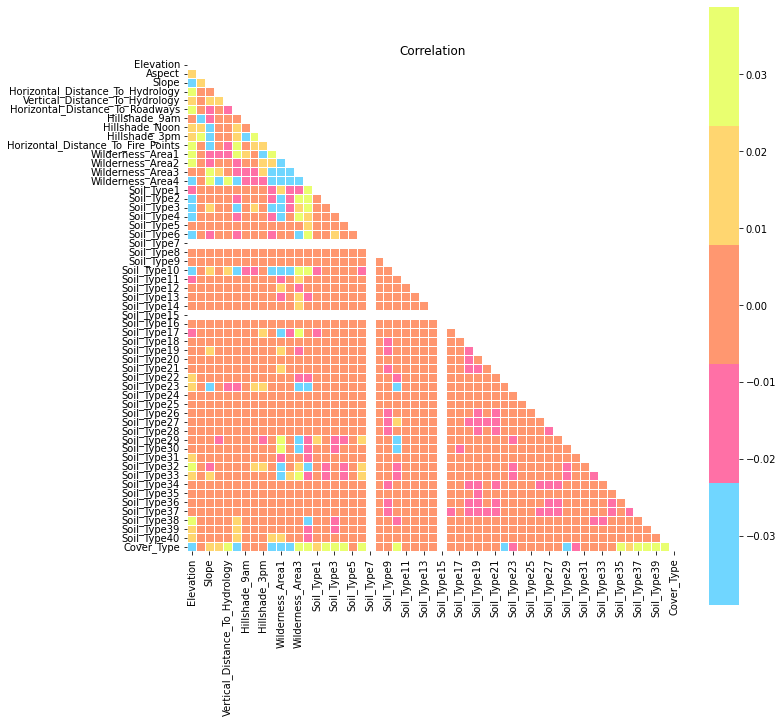

In [14]:
plt.figure(figsize = (11,11))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=custom_colors, robust=True, center=0,square=True, linewidths =.6)
plt.title('Correlation')
plt.show()

In [15]:
df_train.drop(columns = ['Soil_Type7','Soil_Type15'], inplace = True)
df_test.drop(columns = ['Soil_Type7','Soil_Type15'], inplace = True)

In [16]:
df_train.Cover_Type.value_counts()

2    2262087
1    1468136
3     195712
7      62261
6      11426
4        377
5          1
Name: Cover_Type, dtype: int64

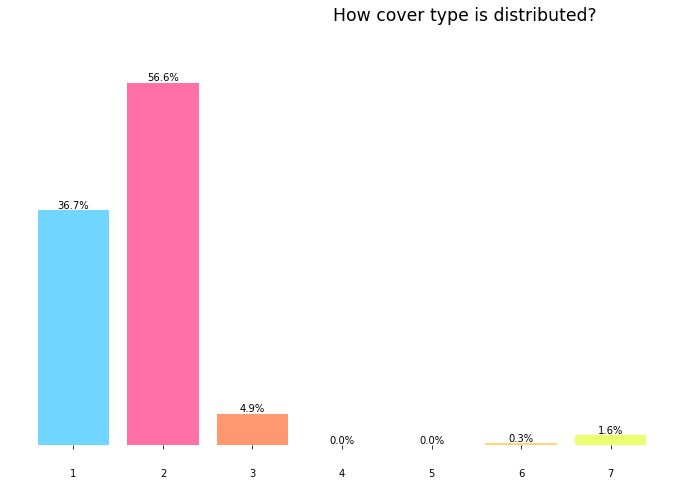

In [17]:
fig, ax = plt.subplots(figsize=(12,7))
bar_ch = ax.bar(df_train['Cover_Type'].value_counts().sort_index().index, df_train['Cover_Type'].value_counts().sort_index().values, color=['#70D6FF',"#FF70A6","#FF9770",'#70D6FF',"#FF70A6","#FFD670","#E9FF70"])
plt.text(3.9,2650000, 'How cover type is distributed?',{'font': 'Times New Roman','fontsize':'xx-large','style':'normal'})
ax.tick_params(axis="x", pad=20)
ax.bar_label(bar_ch, [f"{x*100:2.1f}%" for x in df_train['Cover_Type'].value_counts().sort_index().values/len(df_train)])
ax.set_xticklabels(('0','1', '2', '3','4','5','6','7'))
ax.axes.get_xaxis().set_visible(True)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

<p style="font-family: Trebuchet MS; line-height: 2; font-size: 14px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #3a0ca3">Target distribution is imbalanced. Covertype 2 is the most dominated. There is no existence of Covertype 4 and 5.</p>

In [18]:
df_train.skew()

Elevation                             -0.063051
Aspect                                 0.498374
Slope                                  0.732752
Horizontal_Distance_To_Hydrology       1.750869
Vertical_Distance_To_Hydrology         1.755169
Horizontal_Distance_To_Roadways        1.229078
Hillshade_9am                         -1.342551
Hillshade_Noon                        -1.146600
Hillshade_3pm                         -0.316813
Horizontal_Distance_To_Fire_Points     1.552941
Wilderness_Area1                       1.087254
Wilderness_Area2                       4.587674
Wilderness_Area3                      -0.645495
Wilderness_Area4                       6.546293
Soil_Type1                             7.509614
Soil_Type2                             5.422043
Soil_Type3                            15.195237
Soil_Type4                             4.838985
Soil_Type5                             7.787713
Soil_Type6                            11.065052
Soil_Type8                            18

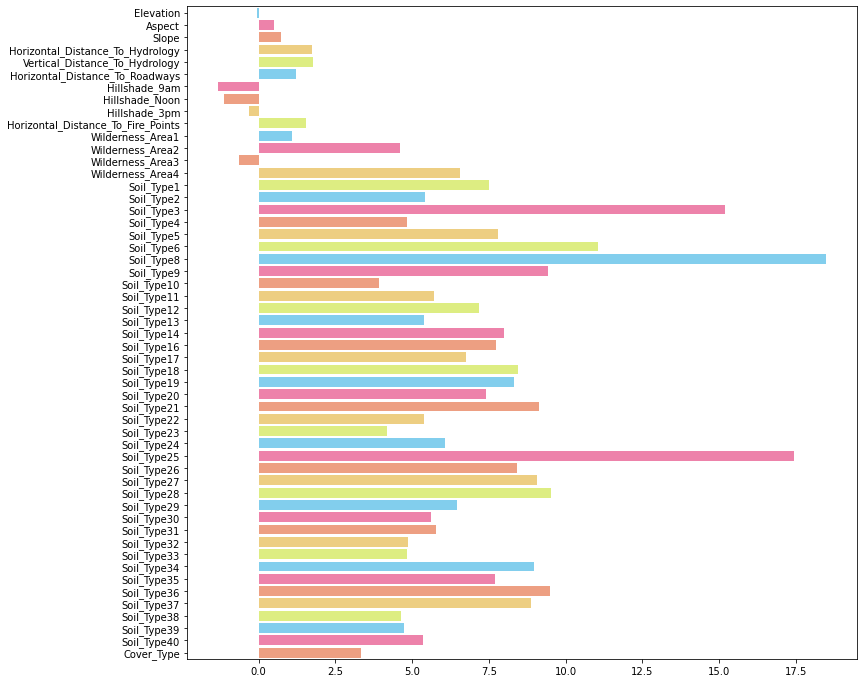

In [19]:
fig = plt.figure(figsize=(12,12))
data_sk = df_train[df_train.columns].skew()
sns.barplot(x=data_sk, y=data_sk.index, palette=custom_colors)
plt.show()

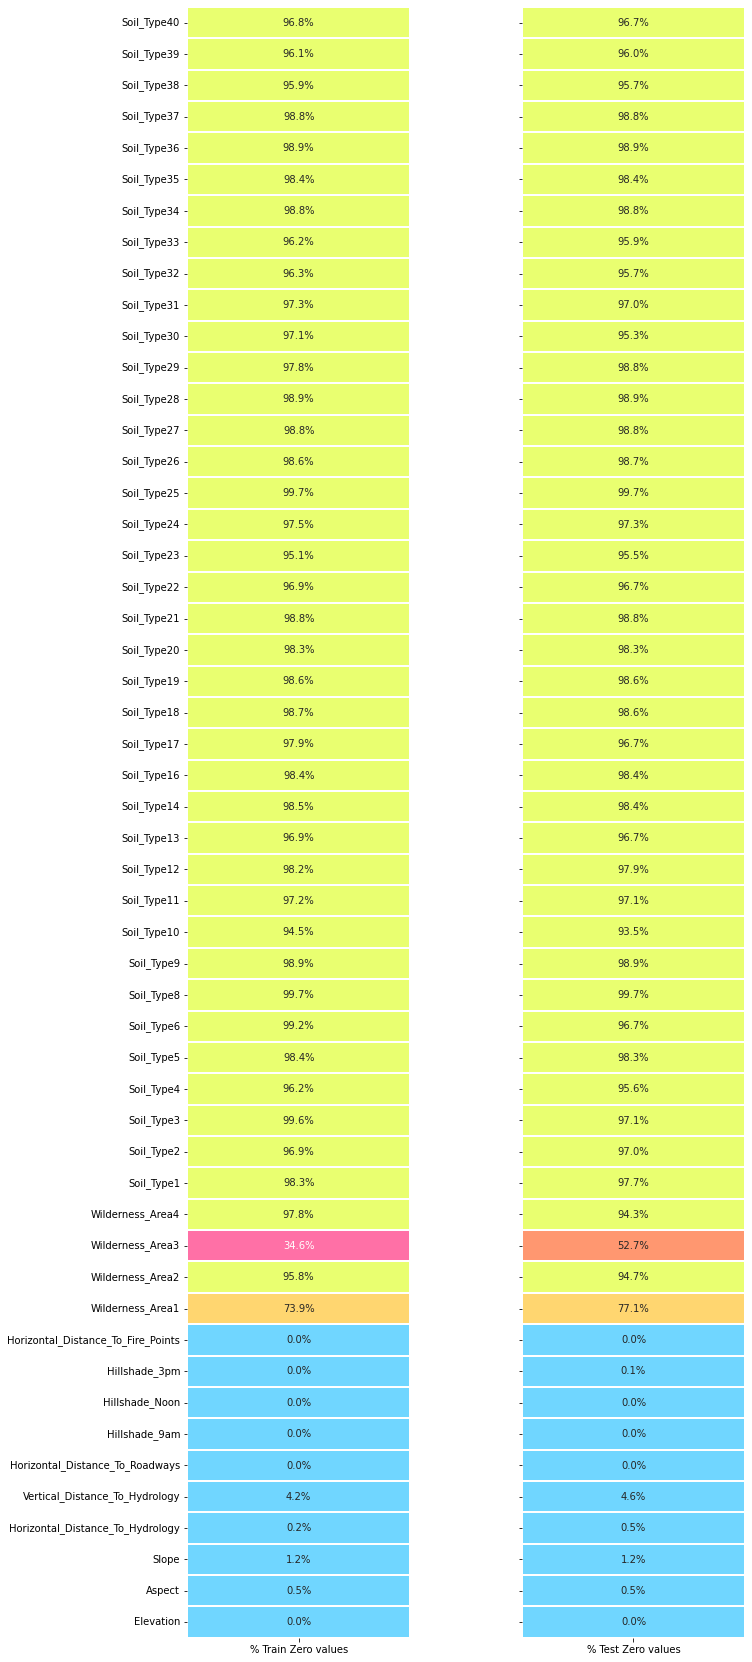

In [20]:
background_color = 'white'
zeros = pd.DataFrame(columns=['% Train Zero values'],data=((df_train.iloc[:,:55]==0).sum() / len(df_train))[::-1])
zeros.drop(['Cover_Type'],inplace=True)
zeros_tst = pd.DataFrame(columns=['% Test Zero values'],data=((df_test.iloc[:,:55]==0).sum() / len(df_test))[::-1])
fig = plt.figure(figsize=(10, 30),facecolor=background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
for s in ["right", "top","bottom","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
sns.heatmap(zeros,cbar=False,annot=True,fmt=".1%", cmap=custom_colors,linewidths=2,vmax=1, ax=ax0)
sns.heatmap(zeros_tst,cbar=False,annot=True,fmt=".1%", cmap=custom_colors,linewidths=2,vmax=1, ax=ax1)
ax1.set_yticklabels([])
plt.show()

In [21]:
df_train['Wild Areas'] = (df_train.iloc[:,10:14] == 1).idxmax(1)
df_train['Soil types'] = (df_train.iloc[:,14:54] == 1).idxmax(1)

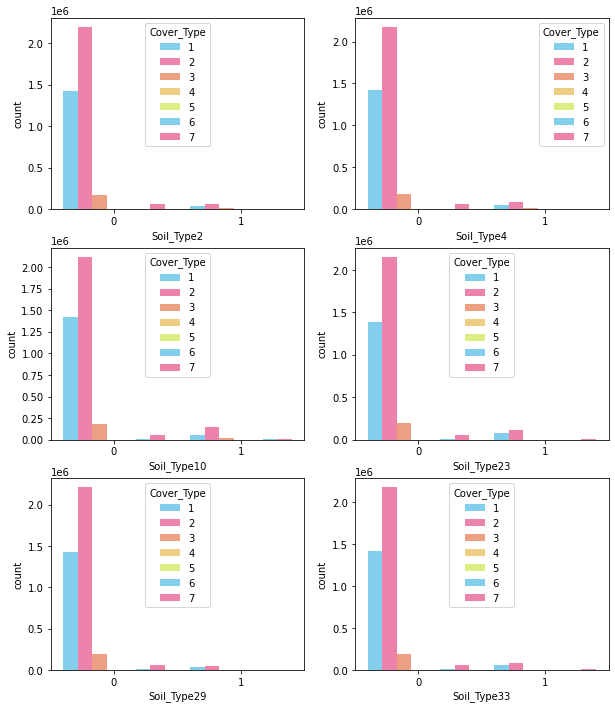

In [22]:
df_st=['Soil_Type2','Soil_Type4','Soil_Type10','Soil_Type23','Soil_Type29','Soil_Type33']
fig, axs = plt.subplots(3, 2, figsize=(10,12))
axs = axs.flatten()
for i, col_name in enumerate(df_st):
    sns.countplot(x=col_name, data=df_train, ax=axs[i], hue =df_train['Cover_Type'],palette=custom_colors)

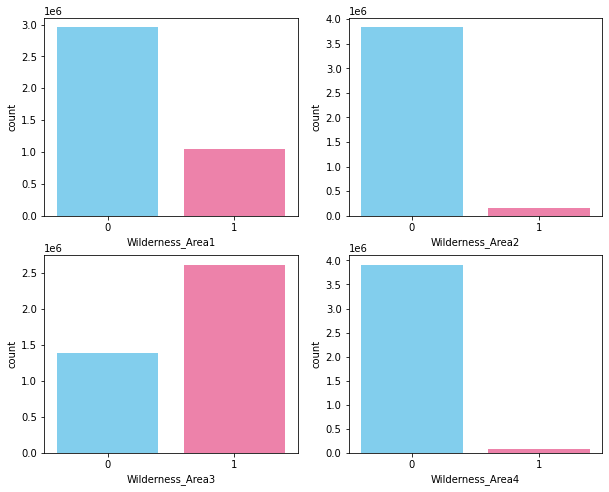

In [35]:
df_st=['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']
fig, axs = plt.subplots(2, 2, figsize=(10,8))
axs = axs.flatten()
for i, col_name in enumerate(df_st):
    sns.countplot(x=col_name, data=df_train, ax=axs[i],palette=custom_colors)

<AxesSubplot:xlabel='Wild Areas', ylabel='Aspect'>

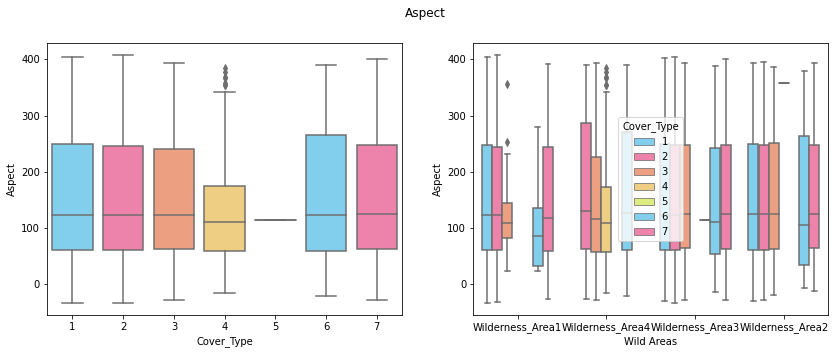

In [23]:
fig, axs = plt.subplots(ncols=2,figsize=(14,5))
fig.suptitle("Aspect")
sns.boxplot(x= "Cover_Type",y="Aspect",data=df_train,palette=custom_colors,ax=axs[0])
sns.boxplot(x= 'Wild Areas',y="Aspect",data=df_train,palette=custom_colors,ax=axs[1],hue='Cover_Type')

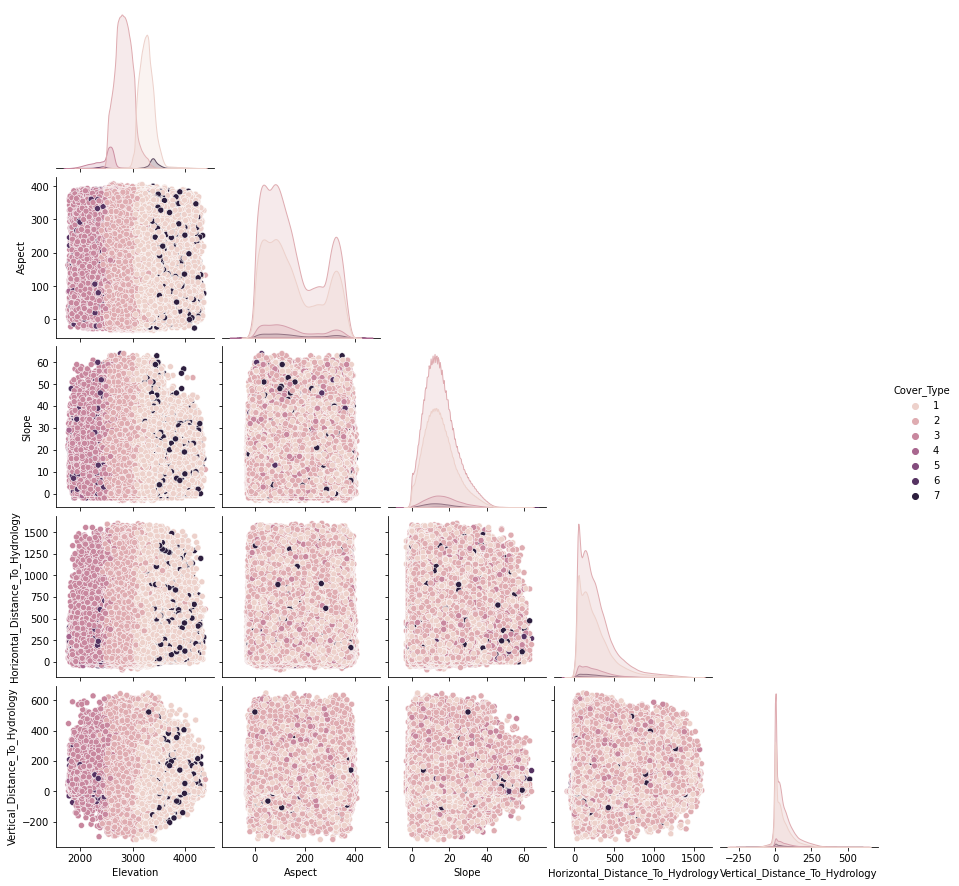

In [24]:
tr_col = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology', 'Cover_Type']
df = df_train[tr_col]
sns.pairplot(df, hue='Cover_Type', corner=True)
plt.show()

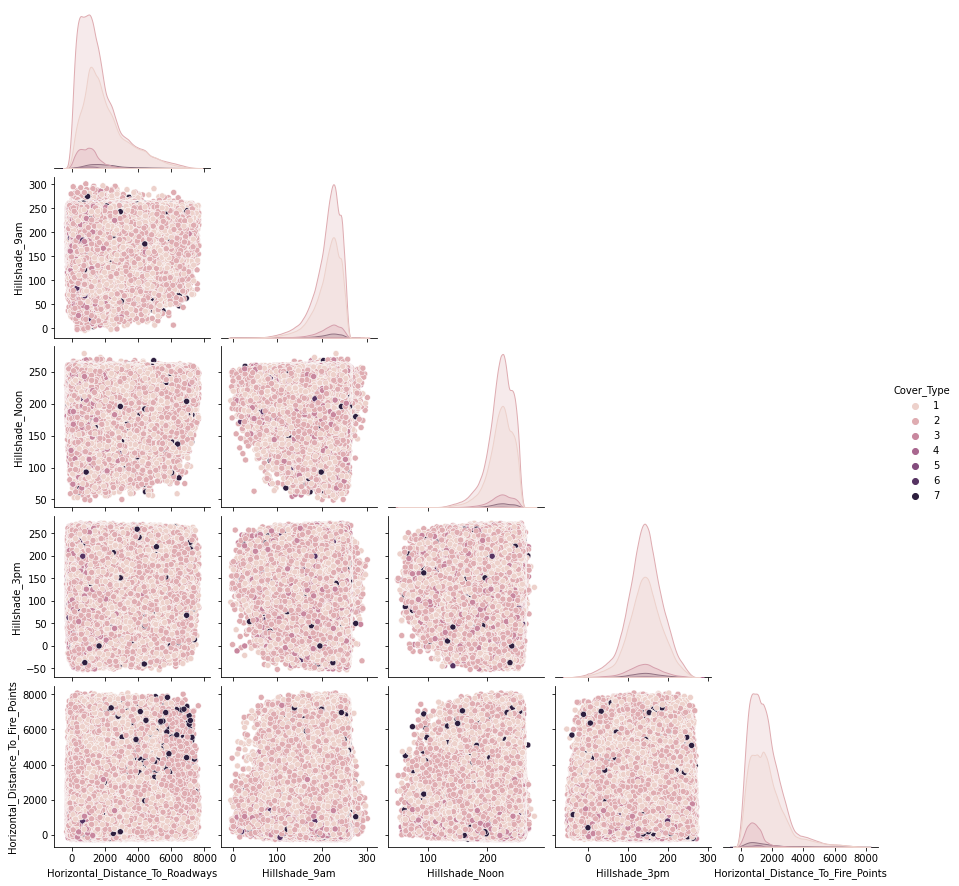

In [25]:
tr_col1 = ['Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points','Cover_Type']
df = df_train[tr_col1]
sns.pairplot(df, hue='Cover_Type', corner=True)
plt.show()

In [26]:
fig = px.treemap(df_train, path=['Wild Areas','Cover_Type'],values='Elevation')
fig.show()

<h3 style="font-family: Arial;background-color:#ff4d6d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;font-size: 20px"><strong><centre>If you found this notebook useful, please Upvote. Thanks! </centre></strong></h3>